In [1]:
import pandas as pd
import numpy as np
features = list()
with open('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset//features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [2]:
X_train = pd.read_csv('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset//train/X_train.txt', delim_whitespace=True, header=None)
print(X_train.shape)
X_train = pd.DataFrame(X_train)
old_col_names = X_train.columns.values
new_names = features
X_train.rename(columns=dict(zip(old_col_names, new_names)), inplace=True)


(7352, 561)


In [3]:
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset//train/subject_train.txt', header=None, squeeze=True)


y_train = pd.read_csv('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset//train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

In [4]:
# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2972,0.276665,-0.018012,-0.110786,-0.987971,-0.939822,-0.958729,-0.990543,-0.934922,-0.957811,-0.927468,...,0.95544,-0.58447,-0.096382,0.374268,0.308511,-0.218976,-0.732825,16,6,LAYING


In [5]:
X_test = pd.read_csv('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset//test/X_test.txt', delim_whitespace=True, header=None)
X_test = pd.DataFrame(X_test)
old_col_names_test = X_test.columns.values
new_names_test = features
X_test.rename(columns=dict(zip(old_col_names_test, new_names_test)), inplace=True)
print("shape of testing data",X_test.shape)


shape of testing data (2947, 561)


In [6]:
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset//test//subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset//test//y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()
print(test.shape)

(2947, 564)


In [7]:
columns = train.columns
# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

<ipython-input-7-9b332e11c4f0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
<ipython-input-7-9b332e11c4f0>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
<ipython-input-7-9b332e11c4f0>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


In [8]:
#this will save train and test as csv files
train.columns = columns
test.columns = columns
train.to_csv('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset/train.csv', index=False)
test.to_csv('C://Users//ABHILASH SINGH//Desktop//BU info//DPA//UCI HAR Dataset//UCI HAR Dataset/test.csv', index=False)


In [9]:
train = pd.read_csv('C://Users//ABHILASH SINGH//Desktop//AppliedAI//HumanActivityRecognition//HAR//UCI_HAR_Dataset//csv_files//train.csv')
test = pd.read_csv('C://Users//ABHILASH SINGH//Desktop//AppliedAI//HumanActivityRecognition//HAR//UCI_HAR_Dataset//csv_files//test.csv') 

In [10]:

train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [11]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [12]:
train.tail()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,2,WALKING_UPSTAIRS


In [13]:
test.tail()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS
2946,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,24,2,WALKING_UPSTAIRS


In [14]:
train.shape

(7352, 564)

In [15]:
test.shape

(2947, 564)

In [16]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAccmeanX to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 564 entries, tBodyAccmeanX to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 12.7+ MB


In [18]:
train.isnull().sum()# To see if there are any null values in our data

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
ActivityName         0
Length: 564, dtype: int64

In [19]:
test.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
ActivityName         0
Length: 564, dtype: int64

In [20]:
train.describe()#This is used to see data distribution.

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


In [21]:
test.describe() #This is used to see data distribution.

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427,3.577876
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984,1.740348
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000,1.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000,2.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000,4.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000,5.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000,6.000000


In [22]:
activity_count = pd.DataFrame(train['ActivityName'].value_counts())
activity_count

,ActivityName
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


# Visualizing the Data

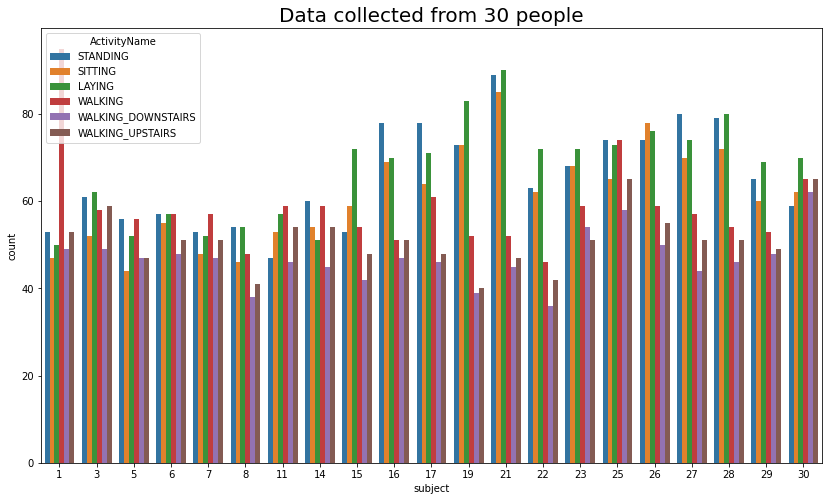

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
plt.title('Data collected from 30 people', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


In [24]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 3.742s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125282
[t-SNE] KL divergence after 1500 iterations: 1.260009


<AxesSubplot:>

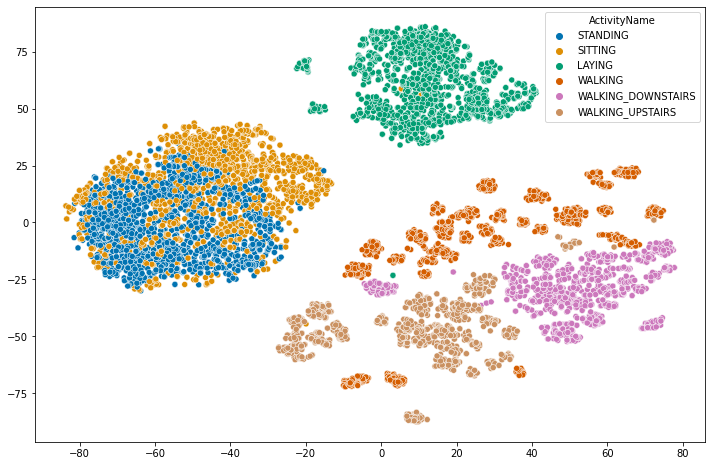

In [25]:
X_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_tsne = train['ActivityName']
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1500).fit_transform(X_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["ActivityName"],palette='colorblind')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.319s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.095322
[t-SNE] KL divergence after 1500 iterations: 1.329280


<AxesSubplot:>

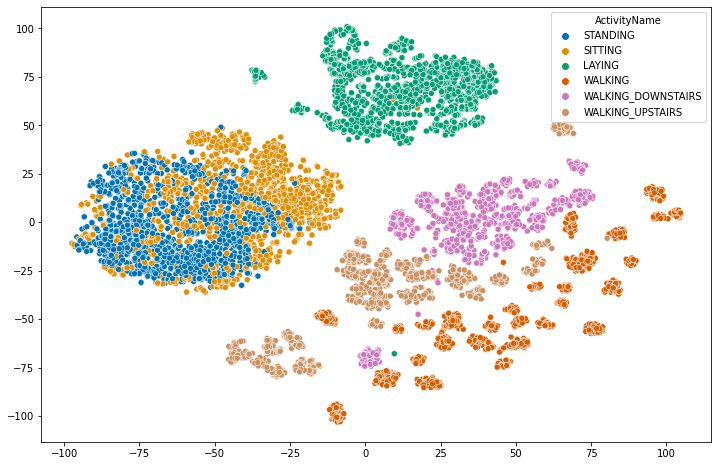

In [26]:
#changing perplexity to find the best result
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=30, n_iter=1500).fit_transform(X_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train['ActivityName'],palette='colorblind')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.212s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.295029
[t-SNE] KL divergence after 1500 iterations: 1.415084


<AxesSubplot:>

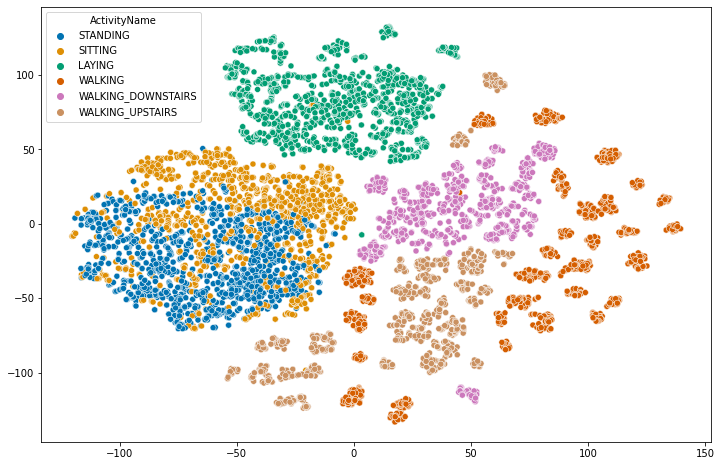

In [27]:
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=10, n_iter=1500).fit_transform(X_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train['ActivityName'],palette='colorblind')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.373s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.081139
[t-SNE] KL divergence after 1500 iterations: 1.422433


<AxesSubplot:>

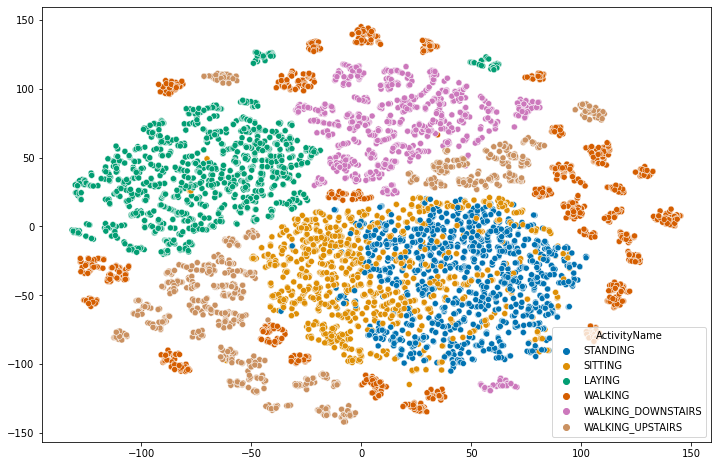

In [28]:
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=5, n_iter=1500).fit_transform(X_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train['ActivityName'],palette='colorblind')

In [29]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.Activity

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)


X_train: (7352, 561)
y_train: (7352,)


In [30]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.Activity

print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_test: (2947, 561)
y_test: (2947,)


# Using Logistic Regression

In [31]:
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer


In [32]:
from sklearn.linear_model  import LogisticRegression

log_reg= LogisticRegression()

log_reg.fit(X_train,y_train,)

y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test,y_pred)
print('accuracy :',accuracy)

conf_mat = confusion_matrix(y_test,y_pred)
print('confusion matrix')
print('\n{}\n\n'.format(conf_mat))

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Precision = true_positive/(true_positive+false_positive)
print('Precision :',Precision)

Recall = true_positive/(true_positive+false_negative)
print('Recall :',Recall)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1 Score :',F1_Score)

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc=multiclass_roc_auc_score(y_test, y_pred, average="macro")
#source : https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
print('AUC:',auc)

accuracy : 0.9582626399728538
confusion matrix

[[492   1   3   0   0   0]
 [ 24 445   2   0   0   0]
 [  4  13 403   0   0   0]
 [  0   3   0 431  57   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


Precision : 0.9979716024340771
Recall : 0.9534883720930233
F1 Score : 0.9752229930624381
AUC: 0.9744664349693145


C:\Users\ABHILASH SINGH\anaconda\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Using Multi-Layered Perceptron Neural network

In [33]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(75,),random_state=1, max_iter=500).fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print('accuracy :',accuracy)

conf_mat = confusion_matrix(y_test,y_pred)
print('confusion matrix')
print('\n{}\n\n'.format(conf_mat))

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Precision = true_positive/(true_positive+false_positive)
print('Precision :',Precision)

Recall = true_positive/(true_positive+false_negative)
print('Recall :',Recall)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1 Score :',F1_Score)

auc=multiclass_roc_auc_score(y_test, y_pred, average="macro")
#source : https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
print('AUC:',auc)

accuracy : 0.9545300305395318
confusion matrix

[[490   1   5   0   0   0]
 [ 23 445   3   0   0   0]
 [  3  14 403   0   0   0]
 [  0   3   0 440  48   0]
 [  1   0   0  20 511   0]
 [  0   0   0   0  13 524]]


Precision : 0.9979633401221996
Recall : 0.9551656920077972
F1 Score : 0.9760956175298805
AUC: 0.9724849833305127


# Using Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


auc=multiclass_roc_auc_score(y_test, y_pred, average="macro")
#source : https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
print('AUC:',auc)


AUC: 0.9724849833305127


# Checking for best parameters

In [35]:
# grid_param = {
#     "n_estimators" : [90,100,115,130],
#     'criterion': ['gini', 'entropy'],
#     'max_depth' : range(1,2,1),
#     'min_samples_leaf' : range(1,5,1),
#     'min_samples_split': range(2,10,1),
#     'max_features' : ['auto','log2']
# }

# from sklearn.model_selection import train_test_split,GridSearchCV
# grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
# grid_search.fit(X_train,y_train)
# #let's see the best parameters as per grid search
# grid_search.best_params_

In [36]:
# rand_clf = RandomForestClassifier(criterion= 'gini',
#  max_depth = 50,
#  max_features = 'auto',
#  min_samples_leaf = 5,
#  min_samples_split= 2,
#  n_estimators = 90,random_state=6)

In [37]:
# rand_clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# auc=multiclass_roc_auc_score(y_test, y_pred, average="macro")
# print('AUC:',auc)

# Feaure selection method

In [38]:
traindf= X_train

features = X_train.columns

traindf = pd.DataFrame(traindf,columns=features)
X = traindf.copy()


In [39]:
#feature selection

from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(estimator=log_reg,prefit= True, max_features=561)
Imp_features=X.loc[:,model.get_support()]

x_train=Imp_features

print('Important features :',len(x_train.columns))

x_test=X_test[x_train.columns]

log_reg= LogisticRegression()

log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print('\naccuracy :',accuracy)

conf_mat = confusion_matrix(y_test,y_pred)
print('\nconfusion matrix')
print('\n{}\n\n'.format(conf_mat))

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Precision = true_positive/(true_positive+false_positive)
print('Precision :',Precision)

Recall = true_positive/(true_positive+false_negative)
print('\nRecall :',Recall)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('\nF1 Score :',F1_Score)

auc=multiclass_roc_auc_score(y_test, y_pred, average="macro")
print('\nAUC:',auc)

Important features : 186

accuracy : 0.9582626399728538

confusion matrix

[[492   1   3   0   0   0]
 [ 24 445   2   0   0   0]
 [  4  13 403   0   0   0]
 [  0   3   0 431  57   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


Precision : 0.9979716024340771

Recall : 0.9534883720930233

F1 Score : 0.9752229930624381

AUC: 0.9744664349693145


C:\Users\ABHILASH SINGH\anaconda\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
x_test

,tBodyAccstdX,tBodyAccstdY,tBodyAccmadX,tBodyAccmadY,tBodyAccmaxX,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX3,tBodyAccarCoeffX4,...,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyGyroMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,-0.938404,-0.920091,-0.952501,-0.925249,-0.894088,-0.168084,-0.378996,0.246217,0.482280,-0.045462,...,0.179435,-1.000000,-0.047391,-0.234815,-0.330370,-0.705974,-0.825886,-0.720009,0.276801,-0.057978
1,-0.975415,-0.967458,-0.986799,-0.968401,-0.894088,-0.302437,-0.348243,-0.404785,0.040674,0.272991,...,-0.218860,-1.000000,-0.031474,-0.431053,-0.121845,-0.594944,-0.434375,-0.698091,0.281343,-0.083898
2,-0.993819,-0.969926,-0.994403,-0.970735,-0.939260,-0.617916,-0.695490,-0.536693,0.032703,0.192385,...,-0.561266,-0.897436,-0.168805,-0.809976,-0.190422,-0.640736,0.064103,-0.702771,0.280083,-0.079346
3,-0.994743,-0.973268,-0.995274,-0.974471,-0.938610,-0.749578,-0.899226,-0.553813,0.034200,0.153639,...,-0.566733,-0.948718,-0.285636,-0.849081,-0.344418,-0.736124,0.340134,-0.698954,0.284114,-0.077108
4,-0.993852,-0.967445,-0.994111,-0.965953,-0.938610,-0.590576,-0.740206,-0.799419,-0.032804,0.294340,...,-0.555564,-1.000000,-0.349061,-0.895847,-0.534685,-0.846595,0.736715,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,-0.287866,-0.140589,-0.356083,-0.148775,0.185361,0.128951,0.250479,0.204483,0.114556,0.069925,...,0.491522,-0.897436,0.093839,0.365783,-0.376278,-0.750809,0.884904,-0.651732,0.274627,0.184784
2943,-0.305388,0.028148,-0.373540,-0.030036,0.185361,0.311991,0.277052,0.112971,0.124019,0.133963,...,0.469640,-1.000000,0.092162,0.402907,-0.320418,-0.700274,-0.657421,-0.655181,0.273578,0.182412
2944,-0.329638,-0.042143,-0.388017,-0.133257,0.007471,0.342902,0.411568,0.167789,0.400424,-0.123618,...,0.363492,-0.846154,-0.122065,0.364393,-0.118854,-0.467179,0.696663,-0.655357,0.274479,0.181184
2945,-0.323114,-0.229775,-0.392380,-0.279610,0.007471,0.194918,0.383999,0.352585,0.541771,-0.204716,...,0.326637,-0.846154,-0.220897,0.238363,-0.205445,-0.617737,0.929294,-0.659719,0.264782,0.187563


# Principal Component Analysis

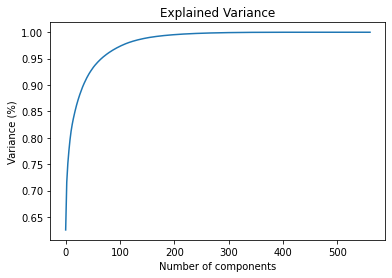

In [41]:
from sklearn.decomposition import PCA
pca = PCA()

X_train_ = pca.fit_transform(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

#### As you can see the after 100 components the graph goes flat. Hence,we can use only 100 features which contribute highly to the output


In [42]:
pca = PCA(n_components=100)
pca
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [43]:
log_reg= LogisticRegression()

log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test,y_pred)
print('accuracy :',accuracy)

conf_mat = confusion_matrix(y_test,y_pred)
print('confusion matrix')
print('\n{}\n\n'.format(conf_mat))

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Precision = true_positive/(true_positive+false_positive)
print('Precision :',Precision)

Recall = true_positive/(true_positive+false_negative)
print('Recall :',Recall)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1 Score :',F1_Score)


auc=multiclass_roc_auc_score(y_test, y_pred, average="macro")
print('AUC:',auc)

accuracy : 0.9460468272819816
confusion matrix

[[492   1   3   0   0   0]
 [ 33 434   4   0   0   0]
 [  4  19 397   0   0   0]
 [  0   3   0 422  66   0]
 [  1   0   0  25 506   0]
 [  0   0   0   0   0 537]]


Precision : 0.9979716024340771
Recall : 0.9371428571428572
F1 Score : 0.9666011787819254
AUC: 0.9670120102514222


C:\Users\ABHILASH SINGH\anaconda\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### We can see that we achieved almost similar accuracy with only 100 features instead of 561. 